In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline 

In [2]:
#The data

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#data analysis 

In [7]:
#find missing values

In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


C:\Users\daved\AppData\Local\Temp\ipykernel_12356\4146104318.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap="YlGnBu")


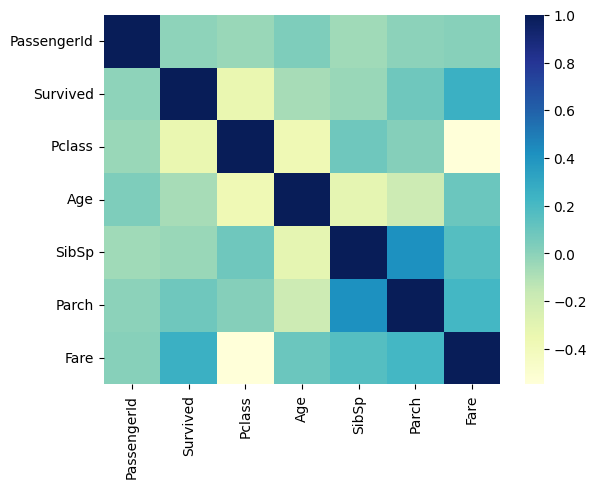

In [9]:
#correlation heatmap for seeing the relation in between the data

import seaborn as sns 

sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

<AxesSubplot: >

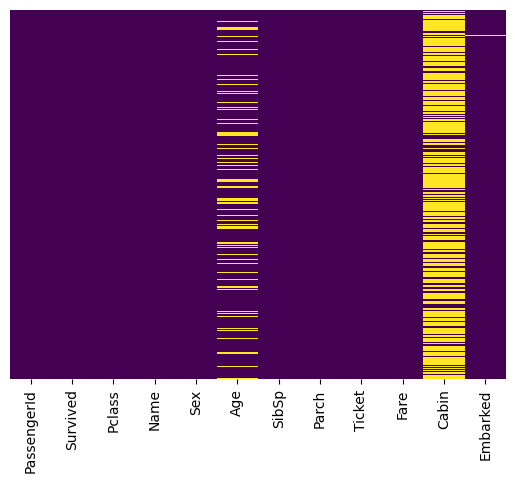

In [10]:
#for seeing the no. of null values in the data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

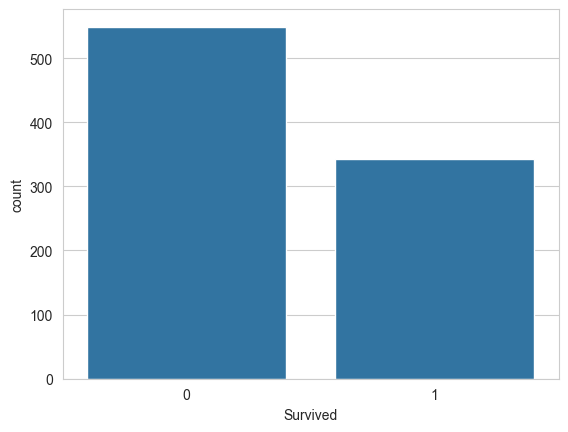

In [11]:
#no. of people survived and not survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

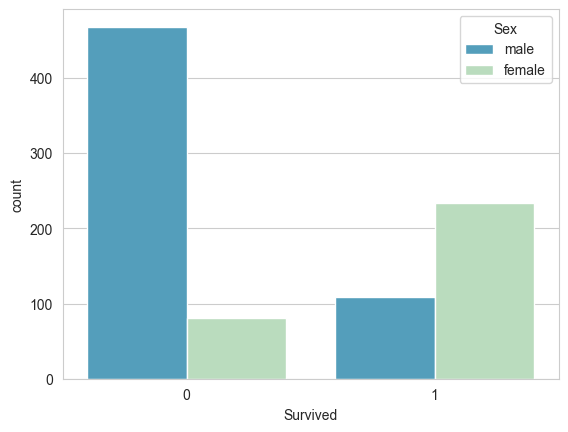

In [12]:
#no. of female and male survived 

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='GnBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

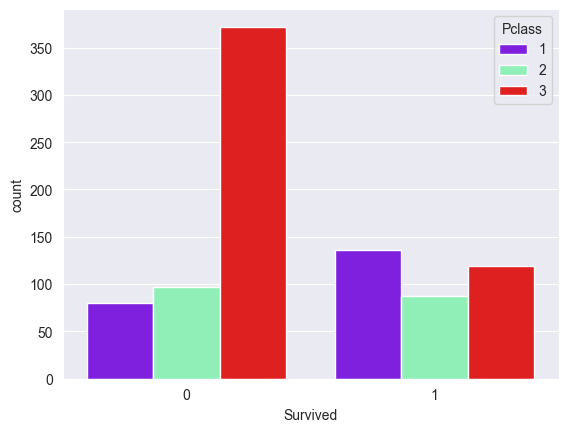

In [13]:
#no. of passenger survived with respect to their passenger class

sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')


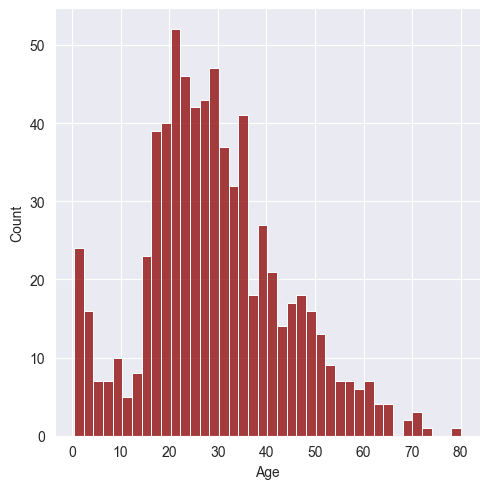

In [14]:
#age range of passangers which were their in the titanic

sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

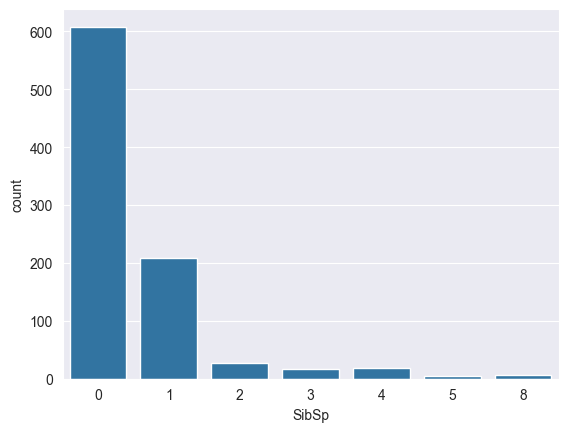

In [15]:
#these gives the count of siblings and spouse

sns.countplot(x='SibSp',data=train)

<AxesSubplot: >

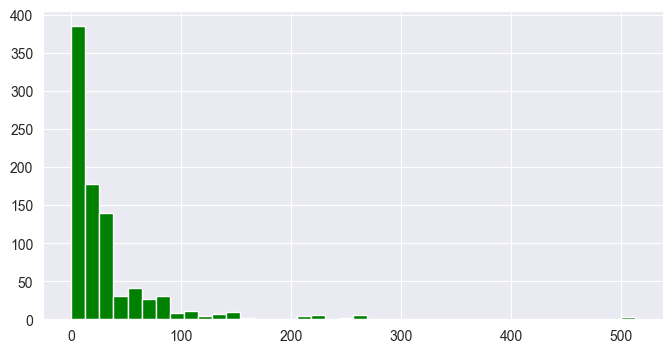

In [16]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [17]:
#data cleaning

C:\Users\daved\AppData\Local\Temp\ipykernel_12356\1152948113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

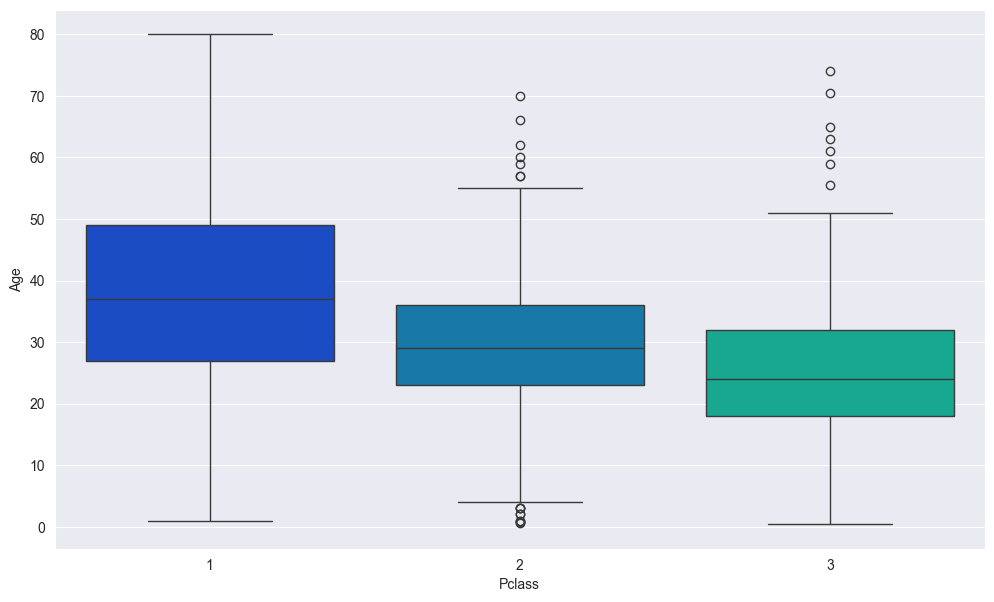

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [19]:
#to fill the null values

In [20]:
def impute_age(cols):
    Age =cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [21]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
#now once again lets check the heatmap

<AxesSubplot: >

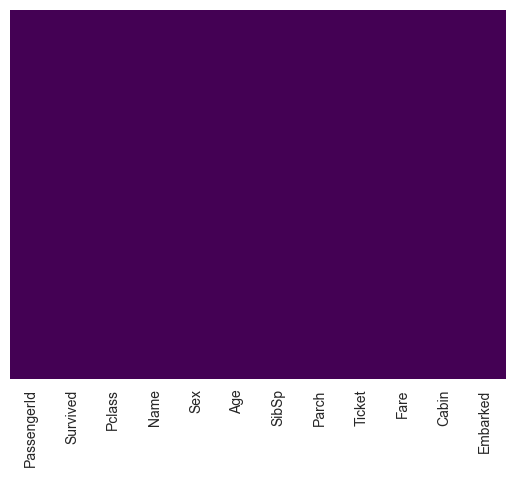

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.dropna(inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [28]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
1,2,1,1,38.0,1,0,71.2833,C85
3,4,1,1,35.0,1,0,53.1000,C123
6,7,0,1,54.0,0,0,51.8625,E46
10,11,1,3,4.0,1,1,16.7000,G6
11,12,1,1,58.0,0,0,26.5500,C103


In [32]:
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [34]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,35.0,1,0,53.1000,C123,0,0,1
6,7,1,54.0,0,0,51.8625,E46,1,0,1
10,11,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,58.0,0,0,26.5500,C103,0,0,1


In [35]:
train['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

NameError: name 'x' is not defined

In [47]:
from sklearn.linear_model import LogisticRegression